In [ ]:
!pip uninstall keras -y
!pip uninstall keras-nightly -y
!pip uninstall keras-Preprocessing -y
!pip uninstall keras-vis -y
!pip uninstall tensorflow -y
!pip uninstall h5py -y

Found existing installation: keras 2.8.0
Uninstalling keras-2.8.0:
  Successfully uninstalled keras-2.8.0
Found existing installation: Keras-Preprocessing 1.1.2
Uninstalling Keras-Preprocessing-1.1.2:
  Successfully uninstalled Keras-Preprocessing-1.1.2
Found existing installation: keras-vis 0.4.1
Uninstalling keras-vis-0.4.1:
  Successfully uninstalled keras-vis-0.4.1
Found existing installation: tensorflow 2.8.0
Uninstalling tensorflow-2.8.0:
  Successfully uninstalled tensorflow-2.8.0
Found existing installation: h5py 3.1.0
Uninstalling h5py-3.1.0:
  Successfully uninstalled h5py-3.1.0


In [ ]:
!pip install tensorflow==1.13.1
!pip install keras==2.0.8
!pip install h5py==2.10.0

     |████████████████████████████████| 92.6 MB 1.2 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 3.2 MB 39.9 MB/s 
     |████████████████████████████████| 50 kB 6.9 MB/s 
     |████████████████████████████████| 367 kB 47.7 MB/s 
     |████████████████████████████████| 4.1 MB 51.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.13.1 which is incompatible.
     |█

In [ ]:
!git clone https://github.com/matterport/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.23 MiB | 33.38 MiB/s, done.
Resolving deltas: 100% (565/565), done.


In [ ]:
cd /content/Mask_RCNN/samples

/content/Mask_RCNN/samples


In [ ]:
!pip install -r /content/Mask_RCNN/requirements.txt

     |████████████████████████████████| 154 kB 5.1 MB/s 
     |████████████████████████████████| 297 kB 59.6 MB/s 


In [ ]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

... done downloading pretrained model!


In [ ]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [ ]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.


In [ ]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']
"""class_names = ['car', 'motorcycle', 'truck','bus']"""
#bus_id=6,truck=8,car=3,motorcycle=4
#r[classids]=[3,4,8,6]    

"class_names = ['car', 'motorcycle', 'truck','bus']"

In [ ]:
"""
Mask R-CNN
Display and Visualization Functions.

Copyright (c) 2017 Matterport, Inc.
Licensed under the MIT License (see LICENSE for details)
Written by Waleed Abdulla
"""

import os
import sys
import random
import itertools
import colorsys

import numpy as np
from skimage.measure import find_contours
import matplotlib.pyplot as plt
from matplotlib import patches,  lines
from matplotlib.patches import Polygon
import IPython.display

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils


############################################################
#  Visualization
############################################################

def display_images(images, titles=None, cols=4, cmap=None, norm=None,
                   interpolation=None):
    """Display the given set of images, optionally with titles.
    images: list or array of image tensors in HWC format.
    titles: optional. A list of titles to display with each image.
    cols: number of images per row
    cmap: Optional. Color map to use. For example, "Blues".
    norm: Optional. A Normalize instance to map values to colors.
    interpolation: Optional. Image interpolation to use for display.
    """
    titles = titles if titles is not None else [""] * len(images)
    rows = len(images) // cols + 1
    plt.figure(figsize=(14, 14 * rows // cols))
    i = 1
    for image, title in zip(images, titles):
        plt.subplot(rows, cols, i)
        plt.title(title, fontsize=9)
        plt.axis('off')
        plt.imshow(image.astype(np.uint8), cmap=cmap,
                   norm=norm, interpolation=interpolation)
        i += 1
    plt.show()


def random_colors(N, bright=True):
    """
    Generate random colors.
    To get visually distinct colors, generate them in HSV space then
    convert to RGB.
    """
    brightness = 1.0 if bright else 0.7
    hsv = [(i / N, 1, brightness) for i in range(N)]
    colors = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))
    random.shuffle(colors)
    return colors


def apply_mask(image, mask, color, alpha=0.5):
    """Apply the given mask to the image.
    """
    for c in range(3):
        image[:, :, c] = np.where(mask == 1,
                                  image[:, :, c] *
                                  (1 - alpha) + alpha * color[c] * 255,
                                  image[:, :, c])
    return image


def display_instances(image, boxes, masks, class_ids, class_names,
                      scores=None, title="",
                      figsize=(16, 16), ax=None,
                      show_mask=True, show_bbox=True,
                      colors=None, captions=None):
    """
    boxes: [num_instance, (y1, x1, y2, x2, class_id)] in image coordinates.
    masks: [height, width, num_instances]
    class_ids: [num_instances]
    class_names: list of class names of the dataset
    scores: (optional) confidence scores for each box
    title: (optional) Figure title
    show_mask, show_bbox: To show masks and bounding boxes or not
    figsize: (optional) the size of the image
    colors: (optional) An array or colors to use with each object
    captions: (optional) A list of strings to use as captions for each object
    """
    # Number of instances
    N = boxes.shape[0]
    if not N:
        print("\n*** No instances to display *** \n")
    else:
        assert boxes.shape[0] == masks.shape[-1] == class_ids.shape[0]

    # If no axis is passed, create one and automatically call show()
    auto_show = False
    if not ax:
        _, ax = plt.subplots(1, figsize=figsize)
        auto_show = True

    # Generate random colors
    colors = colors or random_colors(N)

    # Show area outside image boundaries.
    height, width = image.shape[:2]
    ax.set_ylim(height + 10, -10)
    ax.set_xlim(-10, width + 10)
    ax.axis('off')
    ax.set_title(title)

    masked_image = image.astype(np.uint32).copy()
    def result_new(masked_image):
    #for i in range(N):        
        color = colors[i]
        #print(f'class_ids[i]:{class_ids[i]}')
        # Bounding box
        #if not np.any(boxes[i]):
            # Skip this instance. Has no bbox. Likely lost in image cropping.
            #continue
        y1, x1, y2, x2 = boxes[i]
        if show_bbox:
            p = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2,
                                alpha=0.7, linestyle="dashed",
                                edgecolor=color, facecolor='none')
            ax.add_patch(p)

        # Label
        if not captions:
            class_id = class_ids[i]
            score = scores[i] if scores is not None else None
            label = class_names[class_id]
            caption = "{} {:.3f}".format(label, score) if score else label
        else:
            caption = captions[i]
        ax.text(x1, y1 + 8, caption,
                color='w', size=11, backgroundcolor="none")

        # Mask
        mask = masks[:, :, i]
        #print(f'mask:{mask}')
        if show_mask:
            masked_image = apply_mask(masked_image, mask, color)

        # Mask Polygon
        # Pad to ensure proper polygons for masks that touch image edges.
        padded_mask = np.zeros(
            (mask.shape[0] + 2, mask.shape[1] + 2), dtype=np.uint8)
        padded_mask[1:-1, 1:-1] = mask
        contours = find_contours(padded_mask, 0.5)
        for verts in contours:
            # Subtract the padding and flip (y, x) to (x, y)
            verts = np.fliplr(verts) - 1
            p = Polygon(verts, facecolor="none", edgecolor=color)
            ax.add_patch(p)
        #break
    i=0
    for i in range(N):
      #bus_id=6,truck=8,car=3,motorcycle=4
      #r[classids]=[3,4,8,6]    
      if class_ids[i]==3 or class_ids[i]==4:
        result_new(masked_image)  
      elif class_ids[i]==8 or class_ids[i]==6:
        result_new(masked_image)
        i+=1
    ax.imshow(masked_image.astype(np.uint8))
    if auto_show:
        plt.show()


/content/Mask_RCNN/images/8053677163_d4c8f416be_z.jpg

In [ ]:
!wget https://www.dailypioneer.com/uploads/2019/story/images/big/delhi-roads-unsafe-2019-08-22.jpg

--2022-04-08 04:38:35--  https://www.dailypioneer.com/uploads/2019/story/images/big/delhi-roads-unsafe-2019-08-22.jpg
Resolving www.dailypioneer.com (www.dailypioneer.com)... 138.201.52.44
Connecting to www.dailypioneer.com (www.dailypioneer.com)|138.201.52.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38370 (37K) [image/jpeg]
Saving to: ‘delhi-roads-unsafe-2019-08-22.jpg’

delhi-roads-unsafe- 100%[===================>]  37.47K  --.-KB/s    in 0.1s    

2022-04-08 04:38:35 (373 KB/s) - ‘delhi-roads-unsafe-2019-08-22.jpg’ saved [38370/38370]



In [ ]:
!wget https://www.geo.tv/assets/uploads/updates/2017-12-28/174165_1963722_updates.jpg

--2022-04-08 04:42:39--  https://www.geo.tv/assets/uploads/updates/2017-12-28/174165_1963722_updates.jpg
Resolving www.geo.tv (www.geo.tv)... 104.16.122.91, 104.16.123.91
Connecting to www.geo.tv (www.geo.tv)|104.16.122.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63578 (62K) [image/jpeg]
Saving to: ‘174165_1963722_updates.jpg’

174165_1963722_upda 100%[===================>]  62.09K  --.-KB/s    in 0.01s   

2022-04-08 04:42:39 (5.77 MB/s) - ‘174165_1963722_updates.jpg’ saved [63578/63578]



In [ ]:
!wget https://www.autoindustriya.com/image.php?src=/images/posts/post18142.jpg&w=1440&s=1

Processing 1 images
image                    shape: (424, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


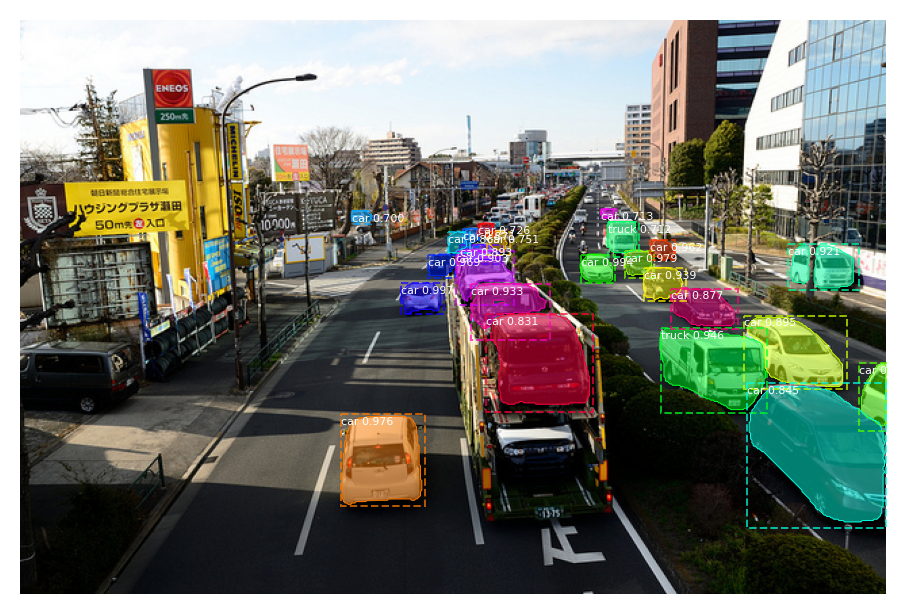

In [ ]:
# Load a random image from the images folder
#file_names = next(os.walk(IMAGE_DIR))[2]
#print(file_names)
#file_names='/content/Mask_RCNN/images/8053677163_d4c8f416be_z.jpg'
#file_names=['8053677163_d4c8f416be_z.jpg']
#image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))
image=skimage.io.imread('/content/Mask_RCNN/images/8053677163_d4c8f416be_z.jpg')
#image=skimage.io.imread('/content/Mask_RCNN/samples/delhi-roads-unsafe-2019-08-22.jpg')
#image=skimage.io.imread('/content/Mask_RCNN/samples/174165_1963722_updates.jpg')
#image=skimage.io.imread('/content/Mask_RCNN/samples/image.php.jpg')
# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
#print(f'r:{results}')
#print(r['class_ids'])
print(type(r['class_ids']))
print(type(r['rois']))
print(type(r['masks']))
print(type(r['scores']))
l_r=[3,4,8,6]
r_cl_l=[]
roi_l=[]
mask_l=[]
score_l=[]
i=0
#for r_e in r['class_ids']:
for l_e in l_r:
#for l_e in l_r:
  test_l=[]
  #for l_e in l_r:
  for r_e in r['class_ids']:
    if r_e==l_e:
      #r_cl_l.append(r_e)
      #roi_l.append(r['rois'][i])
      mask_l.append(r['masks'][i])
      #score_l.append(r['scores'][i])
      #break
    else:
      test_l.append('test')
      pass
  if len(test_l)>0:
    mask_l.append(None)
  else:
    pass
  test_l=[]
  i+=1
import numpy as np
r_cl_l=np.array(r_cl_l)
roi_l=np.array(roi_l)
mask_l=np.array(mask_l)
score_l=np.array(score_l)


#print(type(roi_l)
#print(r_cl_l)
#print(r)
#print(r['class_ids'])
#display_instances(image, r['rois'], r['masks'], r['class_ids'], 
#                            class_names, r['scores'])

#print(r_cl_l)
#print(len(r_cl_l))
#print(len(roi_l))
#print(len(mask_l))
#print(len(score_l))
#display_instances(image, roi_l, mask_l, r_cl_l, 
#                            class_names, score_l)
display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])  